### Data Analysis & train_test_split

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib 
import matplotlib.pyplot as plt
import random

In [2]:
import keras
import numpy
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(1)

Using TensorFlow backend.
/home/julia/miniconda3/envs/deeplearning_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/julia/miniconda3/envs/deeplearning_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/julia/miniconda3/envs/deeplearning_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

In [3]:
#Import the images from 11 artists I need for my training
images_dir = '../data_images/resized/resized_train_test'
data_artists = pd.read_csv('../data/processed/data_artists.csv')
artists_dirs = os.listdir(images_dir)
artists_top_name = data_artists['name'].str.replace(' ', '_').values

# See if all directories exist
for name in artists_top_name:
    if os.path.exists(os.path.join(images_dir, name)):
        print("Found -->", os.path.join(images_dir, name))
    else:
        print("Did not find -->", os.path.join(images_dir, name))


Found --> ../data_images/resized/resized_train_test/Vincent_van_Gogh
Found --> ../data_images/resized/resized_train_test/Pablo_Picasso
Found --> ../data_images/resized/resized_train_test/Pierre-Auguste_Renoir
Found --> ../data_images/resized/resized_train_test/Francisco_Goya
Found --> ../data_images/resized/resized_train_test/Albrecht_Dürer
Found --> ../data_images/resized/resized_train_test/Alfred_Sisley
Found --> ../data_images/resized/resized_train_test/Marc_Chagall
Found --> ../data_images/resized/resized_train_test/Edgar_Degas
Found --> ../data_images/resized/resized_train_test/Rembrandt
Found --> ../data_images/resized/resized_train_test/Titian
Found --> ../data_images/resized/resized_train_test/Paul_Gauguin


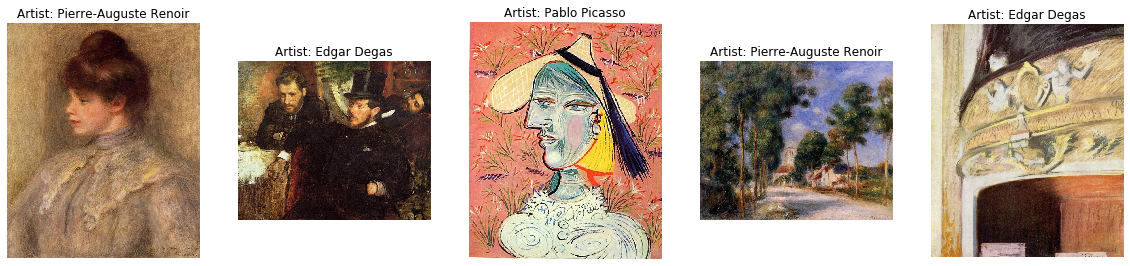

In [4]:
#See if images have been imported correctly 
n = 5
fig, axes = plt.subplots(1, n, figsize=(20,10))

for i in range(n):
    random_artist = random.choice(artists_top_name)
    random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
    random_image_file = os.path.join(images_dir, random_artist, random_image)
    image = plt.imread(random_image_file)
    axes[i].imshow(image)
    axes[i].set_title("Artist: " + random_artist.replace('_', ' '))
    axes[i].axis('off')

plt.show()

In [5]:
#Train_test_split
#BS = 2633
#EPOCHS = 100
#aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,horizontal_flip=True, fill_mode="nearest")

In [6]:
#H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS), validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,epochs=EPOCHS)

In [7]:
#Train_test_split
'''BS = 2633
EPOCHS = 100
def generators(shape, preprocessing): 
    imgdatagen = ImageDataGenerator(preprocessing_function = preprocessing,horizontal_flip = True,validation_split = 0.1)
    height, width = shape
    train_dataset = imgdatagen.flow_from_directory(os.getcwd(),target_size = (height, width),classes = (artists_top_name),batch_size = batch_size,subset = 'training')
    val_dataset = imgdatagen.flow_from_directory(os.getcwd(),target_size = (height, width), classes = (artists_top_name),batch_size = batch_size,subset = 'validation')
    return train_dataset, val_dataset'''

"BS = 2633\nEPOCHS = 100\ndef generators(shape, preprocessing): \n    imgdatagen = ImageDataGenerator(preprocessing_function = preprocessing,horizontal_flip = True,validation_split = 0.1)\n    height, width = shape\n    train_dataset = imgdatagen.flow_from_directory(os.getcwd(),target_size = (height, width),classes = (artists_top_name),batch_size = batch_size,subset = 'training')\n    val_dataset = imgdatagen.flow_from_directory(os.getcwd(),target_size = (height, width), classes = (artists_top_name),batch_size = batch_size,subset = 'validation')\n    return train_dataset, val_dataset"

In [8]:
#Train_test_split
batch_size = 8
train_input_shape = (128, 128, 3)
n_classes = artists_top_name.shape[0]

train_datagen=ImageDataGenerator(validation_split=0.1,rescale=1./255.,horizontal_flip=True,vertical_flip=True)
                                 
train_generator=train_datagen.flow_from_directory(directory=images_dir,class_mode='categorical',target_size=train_input_shape[0:2],batch_size=batch_size,subset="training",shuffle=True,classes=artists_top_name.tolist())
                                                   
valid_generator=train_datagen.flow_from_directory(directory=images_dir,class_mode='categorical',target_size=train_input_shape[0:2],batch_size=batch_size,subset="validation",shuffle=True,classes=artists_top_name.tolist())

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
print("Total number of batches =", STEP_SIZE_TRAIN, "and", STEP_SIZE_VALID)

Found 2375 images belonging to 11 classes.
Found 262 images belonging to 11 classes.
Total number of batches = 296 and 32


In [9]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=train_input_shape)

for layer in base_model.layers:
    layer.trainable = True

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
87916544/87910968 [==============================] - 42s 0us/step


In [10]:
X = base_model.output
X = Flatten()(X)

X = Dense(256, kernel_initializer='he_uniform')(X)
X = Dropout(0.25)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

#X = Dense(16, kernel_initializer='he_uniform')(X)
#X = Dropout(0.25)(X)
#X = BatchNormalization()(X)
#X = Activation('relu')(X)

output = Dense(n_classes, activation='softmax')(X)

model = Model(inputs=base_model.input, outputs=output)

In [11]:
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [12]:
n_epoch = 8

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto')

In [13]:
history1 = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN, validation_data=valid_generator, validation_steps=STEP_SIZE_VALID, epochs=n_epoch, shuffle=True, verbose=1, callbacks=[reduce_lr], use_multiprocessing=True, workers=16)

Epoch 1/8


UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d/Conv2D}}]]
	 [[loss/mul/_3105]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d/Conv2D}}]]
0 successful operations.
0 derived errors ignored.

In [ ]:
for layer in model.layers:
    layer.trainable = False

for layer in model.layers[:50]:
    layer.trainable = True

optimizer = Adam(lr=0.0001)

model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

n_epoch = 100
history2 = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN, validation_data=valid_generator, validation_steps=STEP_SIZE_VALID, epochs=n_epoch, shuffle=True, verbose=1, callbacks=[reduce_lr, early_stop], use_multiprocessing=True, workers=16, class_weight=class_weight)